In [30]:
from __future__ import division

In [31]:
class Config:
  DATASET_PATH ="/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train"
  SINGLE_TEST_PATH = "/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test032"
  BATCH_SIZE = 4
  EPOCHS = 3

In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/._README.txt
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/README.txt~
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/README.txt
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/._UCSDped2.m
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/UCSDped2.m
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/UCSDped2.m~
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test012_gt/frame135.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test012_gt/frame122.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test012_gt/frame072.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test012_gt/frame111.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test012_gt/frame078.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test012_gt/frame058.bmp
/kaggle/input/ucsddataset/UCSD_Ano

/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/008.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/043.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/180.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/077.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/168.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/128.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/018.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/001.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/025.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/175.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/097.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test

/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/122.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/111.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/040.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/141.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/082.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/043.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/008.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/157.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/011.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/007.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/128.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/090.tif
/kaggle/input/uc

/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test010_gt/055.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test010_gt/007.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test010_gt/053.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test010_gt/086.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test010_gt/066.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test010_gt/078.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test010_gt/125.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test010_gt/150.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test010_gt/008.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test010_gt/043.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test010_gt/077.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test

/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train002/122.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train002/111.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train002/040.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train002/141.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train002/082.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train002/043.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train002/008.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train002/011.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train002/007.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train002/128.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train002/090.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train002/

/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test015/122.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test015/183.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test015/111.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test015/040.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test015/141.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test015/082.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test015/043.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test015/008.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test015/157.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test015/011.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test015/007.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test015/128.tif
/kaggle/input/uc

/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test016/148.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test016/071.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test016/077.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test016/085.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test016/162.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test016/173.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test016/092.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test016/147.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test016/114.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test016/063.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test016/177.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test016/101.tif
/kaggle/input/uc

/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004_gt/041.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004_gt/069.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004_gt/080.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004_gt/070.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004_gt/079.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004_gt/112.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004_gt/139.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004_gt/044.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004_gt/185.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004_gt/136.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004_gt/091.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test

/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test011/044.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test011/132.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test011/010.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test011/050.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test011/046.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test011/021.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test011/084.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test011/006.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test011/036.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test011/152.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test011/136.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test011/160.tif
/kaggle/input/uc

/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test019/122.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test019/183.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test019/111.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test019/040.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test019/141.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test019/082.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test019/043.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test019/008.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test019/157.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test019/011.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test019/007.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test019/128.tif
/kaggle/input/uc

/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test024_gt/041.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test024_gt/069.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test024_gt/080.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test024_gt/070.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test024_gt/079.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test024_gt/112.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test024_gt/139.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test024_gt/044.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test024_gt/185.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test024_gt/136.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test024_gt/091.bmp
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test

/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test009/122.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test009/183.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test009/111.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test009/040.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test009/141.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test009/082.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test009/043.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test009/008.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test009/157.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test009/011.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test009/007.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test009/128.tif
/kaggle/input/uc

/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train016/126.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train016/049.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train016/139.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train016/196.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train016/030.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train016/042.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train016/032.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train016/105.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train016/186.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train016/041.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train016/097.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train016/

/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train031/122.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train031/183.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train031/111.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train031/040.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train031/141.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train031/082.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train031/043.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train031/008.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train031/157.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train031/011.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train031/007.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train031/

/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train008/122.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train008/183.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train008/111.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train008/040.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train008/141.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train008/082.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train008/043.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train008/008.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train008/157.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train008/011.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train008/007.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train008/

/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train032/122.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train032/183.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train032/111.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train032/040.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train032/141.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train032/082.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train032/043.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train032/008.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train032/157.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train032/011.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train032/007.tif
/kaggle/input/ucsddataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train032/

/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/._README.txt
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/README.txt~
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/README.txt
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/._UCSDped2.m
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/UCSDped2.m
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/UCSDped2.m~
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test012_gt/frame135.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test012_gt/frame122.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test012_gt/frame072.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test012_gt/frame111.bmp
/kag

/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/094.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/032.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/071.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/101.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/173.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/083.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/012.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/106.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test004_gt/040.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset

/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/041.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/097.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/134.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/086.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/168.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/037.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/044.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/132.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test/Test008/010.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/

/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train004/031.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train004/035.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train004/171.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train004/142.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train004/034.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train004/057.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train004/016.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train004/148.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train004/071.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Ano

/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train013/122.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train013/111.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train013/040.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train013/141.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train013/082.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train013/043.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train013/008.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train013/157.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train013/011.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Ano

/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004/122.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004/183.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004/111.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004/040.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004/141.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004/082.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004/043.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004/008.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test004/157.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/

/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test005/122.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test005/183.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test005/111.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test005/040.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test005/141.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test005/082.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test005/043.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test005/008.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test005/157.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/

/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test014/037.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test014/044.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test014/132.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test014/010.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test014/050.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test014/046.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test014/021.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test014/084.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test014/006.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/

/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test021/122.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test021/183.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test021/111.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test021/040.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test021/141.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test021/082.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test021/043.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test021/008.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test021/157.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/

/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test018_gt/082.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test018_gt/156.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test018_gt/120.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test018_gt/116.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test018_gt/021.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test018_gt/090.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test018_gt/107.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test018_gt/118.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test018_gt/084.bmp
/kaggle/input/ucsddataset/ucsd_anomaly_dataset

/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test035/122.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test035/183.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test035/111.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test035/040.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test035/141.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test035/082.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test035/043.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test035/008.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test035/157.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/

/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train017/122.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train017/183.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train017/111.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train017/040.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train017/141.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train017/082.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train017/043.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train017/008.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train017/157.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Ano

/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train004/184.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train004/168.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train004/188.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train004/037.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train004/044.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train004/132.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train004/010.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train004/050.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train004/046.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Ano

/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train027/013.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train027/068.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train027/144.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train027/017.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train027/081.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train027/131.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train027/180.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train027/028.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train027/127.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Ano

/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train020/122.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train020/183.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train020/111.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train020/040.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train020/141.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train020/082.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train020/043.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train020/008.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train020/157.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Ano

/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train003/118.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train003/013.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train003/068.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train003/144.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train003/017.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train003/081.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train003/131.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train003/180.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train003/028.tif
/kaggle/input/ucsddataset/ucsd_anomaly_dataset/UCSD_Ano

In [33]:

import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import Iterator
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, Dense, Concatenate, Lambda, Input, MaxPool2D, Flatten, Dropout
import keras.backend as K

from itertools import permutations
from os import listdir
from os.path import isfile, join, isdir
from PIL import Image
import numpy as np
import random
import shelve

IMAGE_SIZE = 256        
len_seq = 5
onehotencoder = OneHotEncoder()
perms = list(set(permutations([0,1,2,3,4])))

def get_clips_by_stride(stride, frames_list, sequence_size):
    """ For data augmenting purposes.
    Parameters
    ----------
    stride : int
        The desired distance between two consecutive frames
    frames_list : list
        A list of sorted frames of shape 256 X 256
    sequence_size: int
        The size of the desired LSTM sequence
    Returns
    -------
    list
        A list of clips , 10 frames each
    """
    clips = []
    sz = len(frames_list)
    clip = np.zeros(shape=(sequence_size, IMAGE_SIZE, IMAGE_SIZE, 1))
    cnt = 0
    for start in range(0, stride):
        for i in range(start, sz, stride):
            clip[cnt, :, :, 0] = frames_list[i]
            cnt = cnt + 1
            if cnt == sequence_size:
                clips.append(np.copy(clip))
                cnt = 0
    return clips


class DataGeneratorz (keras.utils.Sequence):
    def __init__(self,batches_per_epoch,batch_size = 32):
        self.batch_size = batch_size
        self.batches_per_epoch = batches_per_epoch
        self.on_epoch_end()
    def __len__(self):
        return self.batches_per_epoch
    def __getitem__(self,index):
        X, y = self.__data_generation()
        return X, y
    def on_epoch_end(self):
        pass
    def __data_generation(self):
        clips = []
        list_files = (listdir(Config.DATASET_PATH))
        random.shuffle(list_files)
        print(list_files[0])
        f = list_files[0]
        if isdir(join(Config.DATASET_PATH, f)):
            all_frames = []
        #loop over and get all the images from the folder 
        for c in sorted(listdir(join(Config.DATASET_PATH, f))):
            if str(join(join(Config.DATASET_PATH, f), c))[-3:] == "tif":
                img = Image.open(join(join(Config.DATASET_PATH, f), c)).resize((IMAGE_SIZE, IMAGE_SIZE))
                img = np.array(img, dtype=np.float32) / 255.0
                all_frames.append(img)
            #clips.extend(get_clips_by_stride(stride=3, frames_list=all_frames, sequence_size=5))
            clips = get_clips_by_stride(stride=24, frames_list=all_frames, sequence_size=5)
        random.shuffle(clips)
        clips = np.array(clips)
        batch_x = np.array([[np.zeros((IMAGE_SIZE,IMAGE_SIZE,1)),np.zeros((IMAGE_SIZE,IMAGE_SIZE,1)),np.zeros((IMAGE_SIZE,IMAGE_SIZE,1)),np.zeros((IMAGE_SIZE,IMAGE_SIZE,1)),np.zeros((IMAGE_SIZE,IMAGE_SIZE,1))] for i in range(self.batch_size)])
        #batch_y = np.array([None for i in range(self.batch_size)])
        batch_y = np.zeros(32, dtype='float32')
        #rearrange image
        cnt= 0
        for x in range(self.batch_size):
            label = np.random.randint(0,120)
            i=0
            perm = perms[label]
            
            for k in perm:
                batch_x[cnt][i] = clips[x,k,:,:,:]
                i = i+1
            #print("LABEL : ", label, "   PERM : ", perm)
            batch_y[cnt] = label
            #batch_y[cnt] = np.array(to_categorical(label, 120))
            cnt = cnt +1
        batch_y = to_categorical(batch_y, 120)
        return batch_x, batch_y

In [34]:
input_ = keras.Input(shape = (5,IMAGE_SIZE,IMAGE_SIZE,1))

conv1 = layers.Conv2D(96,11,strides=4,activation='relu')
mxp1 = layers.MaxPool2D(3,strides=2)
conv2 = layers.Conv2D(256,5,padding='same',activation='relu')
mxp2 = layers.MaxPool2D(3,strides=2)
conv3 = layers.Conv2D(384,3,padding = 'same',activation='relu')
conv4 = layers.Conv2D(384,3,padding = 'same',activation='relu')
conv5 = layers.Conv2D(256,3,padding='same',activation='relu')
mxp3 = layers.MaxPool2D(3,strides = 2)
flat = layers.Flatten()
d1 = layers.Dense(2048,activation = 'relu')
d2 = layers.Dense(2048,activation = 'relu')

y1 = d2(d1(flat(mxp3(conv5(conv4(conv3(mxp2(conv2(mxp1(conv1(Lambda(lambda x:x[:,0,:,:])(input_))))))))))))
y2 = d2(d1(flat(mxp3(conv5(conv4(conv3(mxp2(conv2(mxp1(conv1(Lambda(lambda x:x[:,1,:,:])(input_))))))))))))
y3 = d2(d1(flat(mxp3(conv5(conv4(conv3(mxp2(conv2(mxp1(conv1(Lambda(lambda x:x[:,2,:,:])(input_))))))))))))
y4 = d2(d1(flat(mxp3(conv5(conv4(conv3(mxp2(conv2(mxp1(conv1(Lambda(lambda x:x[:,3,:,:])(input_))))))))))))
y5 = d2(d1(flat(mxp3(conv5(conv4(conv3(mxp2(conv2(mxp1(conv1(Lambda(lambda x:x[:,4,:,:])(input_))))))))))))

concatout = layers.Concatenate()([y1,y2,y3,y4,y5])

out = layers.Dense(2048,activation='relu')(concatout)
dropout = Dropout(0.5)(out)
out = layers.Dense(120,activation='softmax')(out)


Model: "multistream-alexnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 5, 256, 256, 0                                            
__________________________________________________________________________________________________
lambda_5 (Lambda)               (None, 256, 256, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
lambda_6 (Lambda)               (None, 256, 256, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
lambda_7 (Lambda)               (None, 256, 256, 1)  0           input_2[0][0]                    
________________________________________________________________________________

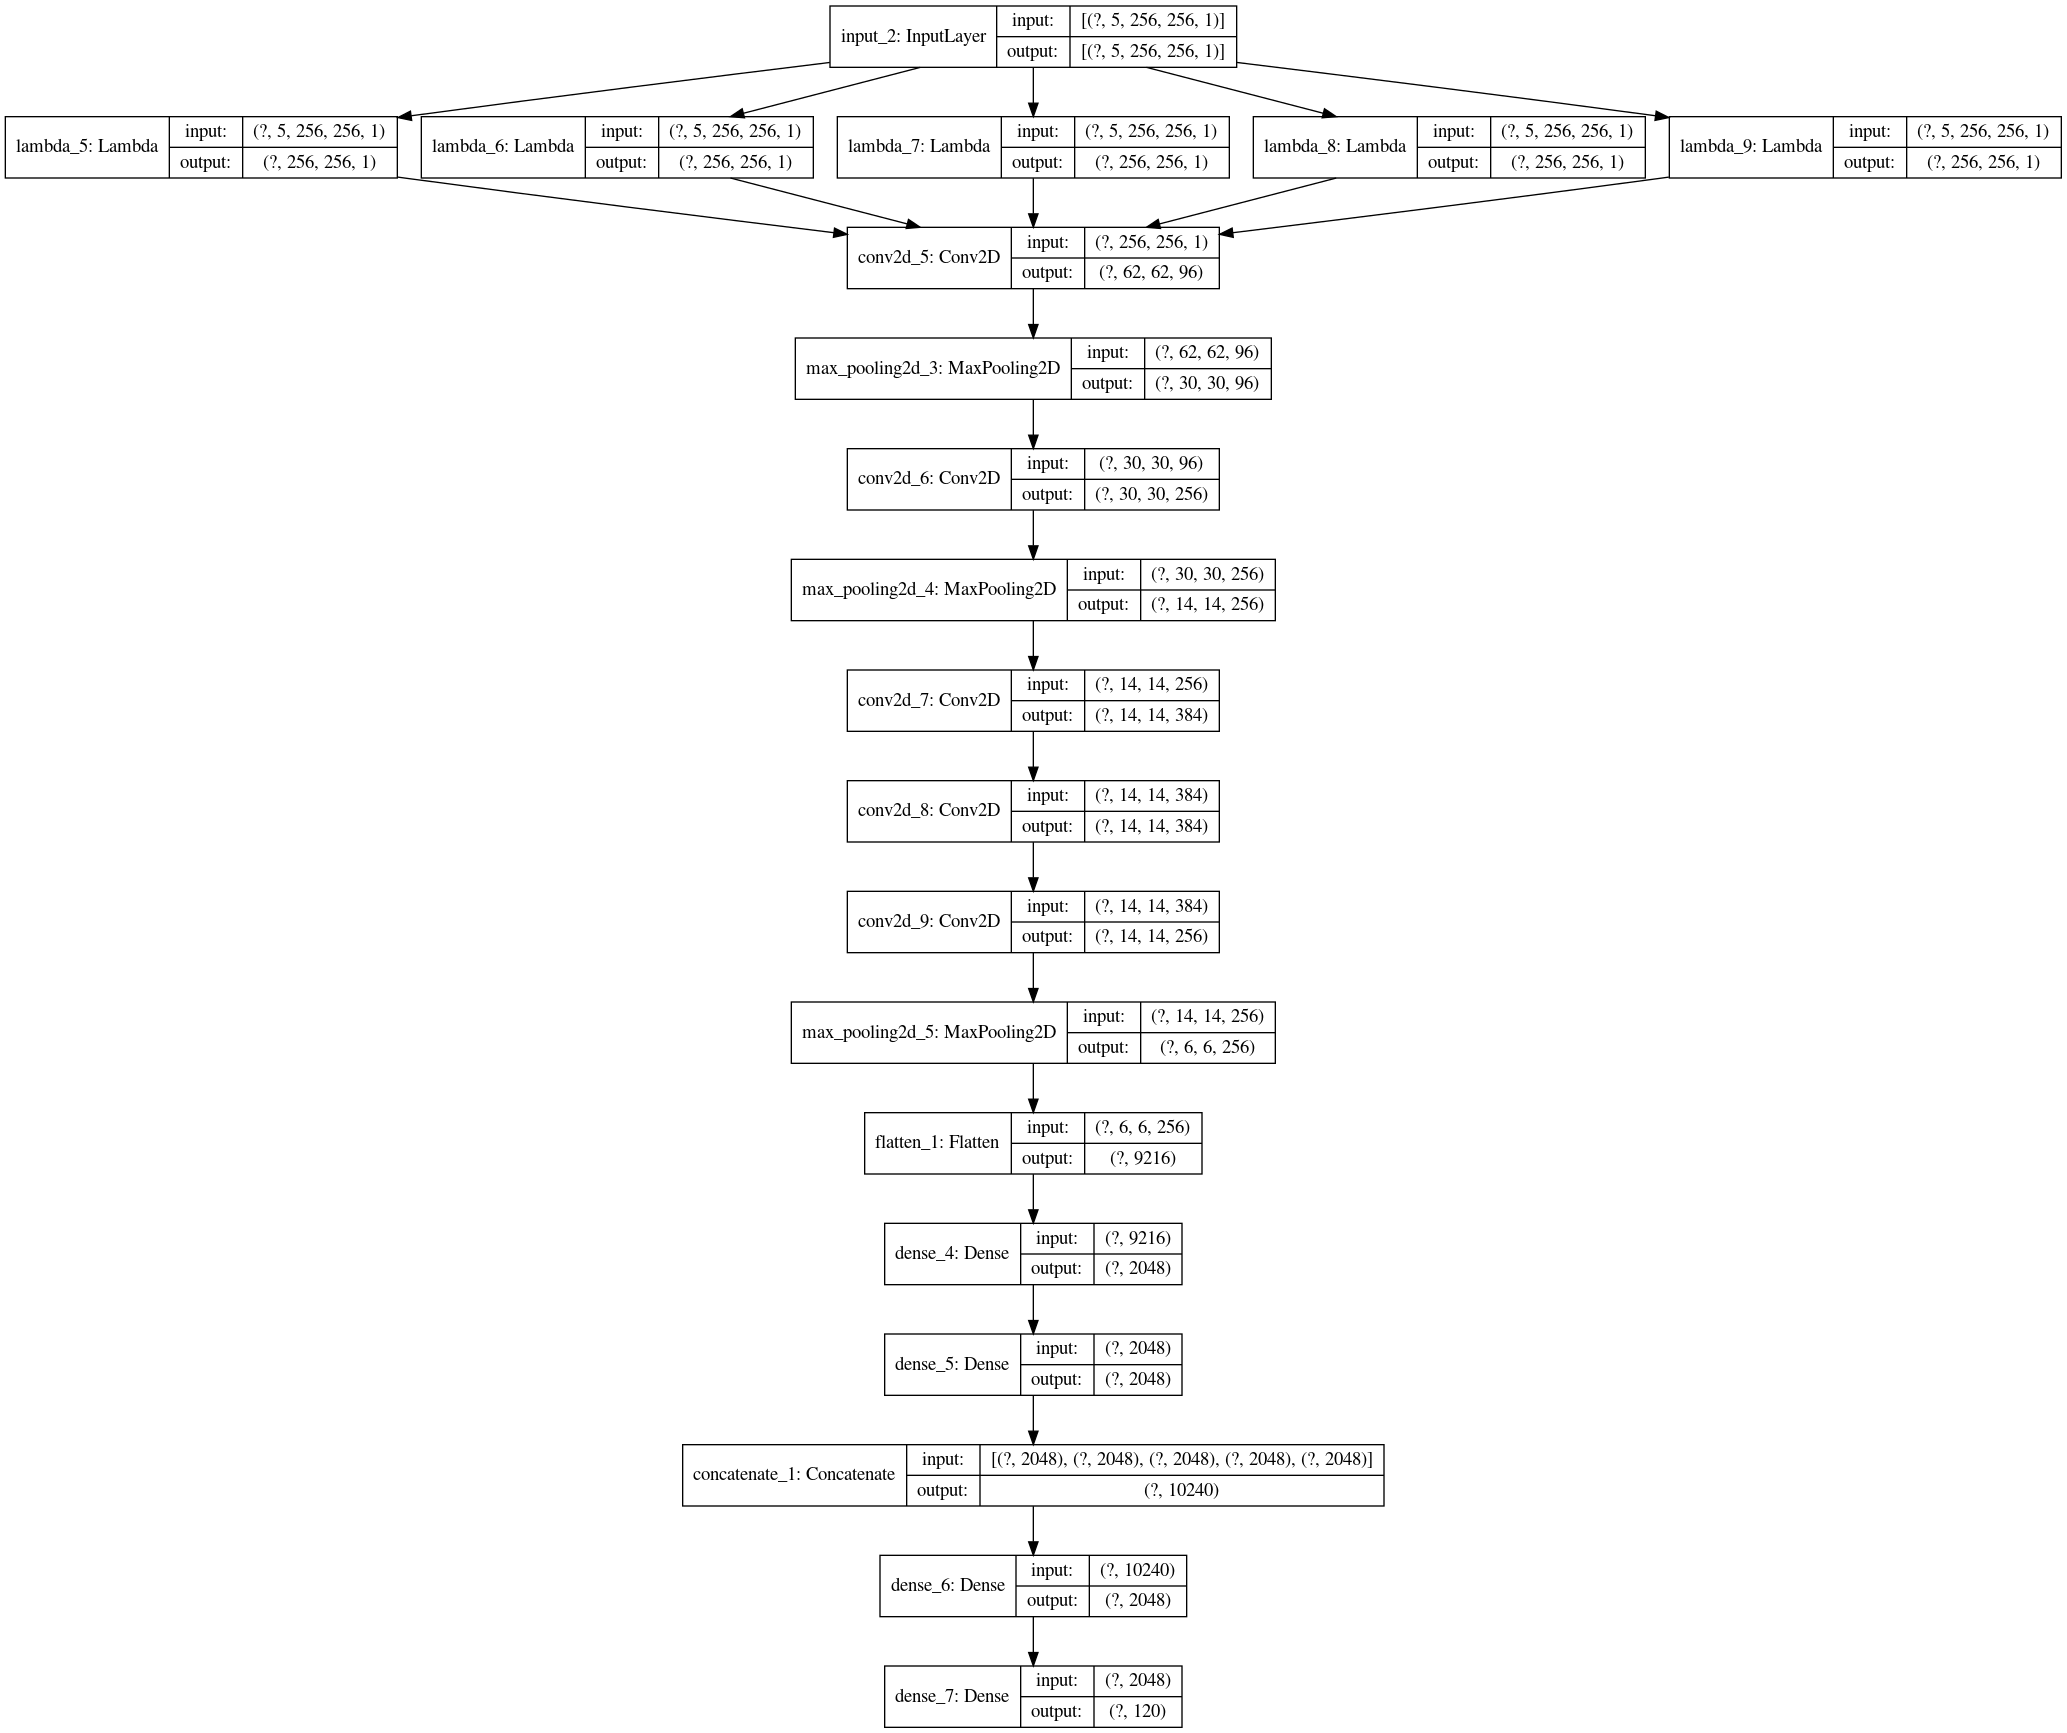

In [35]:
model = keras.Model(inputs=input_, outputs=out, name="multistream-alexnet")

model.summary()

keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)


In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.01))

model.fit(x = DataGeneratorz(50),epochs =3,steps_per_epoch=50, validation_data = DataGeneratorz(10), validation_steps = 10)

Train004
Epoch 1/3
Train034
Train015
50/50 [==============================] - ETA: 0s - loss: 448874.5312 Train032
Train006
Train022
Train008
Train033
Train009
Train018
Train021
Train010
Train015
Train018
50/50 [==============================] - 731s 15s/step - loss: 448874.5312 - val_loss: 4.7892
Epoch 2/3
Train017
Train004
50/50 [==============================] - ETA: 0s - loss: 4.7899 Train031
Train005
Train004
Train032
Train020
Train014
Train033
Train015
Train020
Train030
Train009
50/50 [==============================] - 729s 15s/step - loss: 4.7899 - val_loss: 4.7860
Epoch 3/3
Train018
Train013
 3/50 [>.............................] - ETA: 7:04 - loss: 4.7922Train015


50/50 [==============================] - ETA: 0s - loss: 4.7915 Train024
Train024
Train033
Train021
Train031
Train012
Train016
Train010
Train008
Train024
Train002
50/50 [==============================] - 732s 15s/step - loss: 4.7915 - val_loss: 4.7935


In [38]:
tr = DataGeneratorz(1)

In [39]:
x,y = tr.__getitem__('')

Train018


In [40]:
x[0]

array([[[[0.38431373],
         [0.37254903],
         [0.33725491],
         ...,
         [0.18431373],
         [0.23921569],
         [0.26274511]],

        [[0.33725491],
         [0.32156864],
         [0.3019608 ],
         ...,
         [0.18039216],
         [0.22745098],
         [0.29803923]],

        [[0.27450982],
         [0.26274511],
         [0.25882354],
         ...,
         [0.17647059],
         [0.20784314],
         [0.34509805]],

        ...,

        [[0.47058824],
         [0.47058824],
         [0.48627451],
         ...,
         [0.66666669],
         [0.66274512],
         [0.74117649]],

        [[0.48235294],
         [0.48627451],
         [0.49803922],
         ...,
         [0.67843139],
         [0.67450982],
         [0.76078433]],

        [[0.49019608],
         [0.49411765],
         [0.50588238],
         ...,
         [0.68627453],
         [0.68235296],
         [0.7764706 ]]],


       [[[0.39215687],
         [0.39215687],
         [0.34

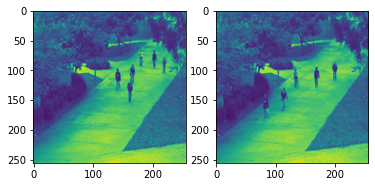

In [41]:
fig = plt.figure()
ax=fig.add_subplot(1,2,1)
imgplot = plt.imshow(x[0][0][:,:,0])
ax=fig.add_subplot(1,2,2)
imgplot = plt.imshow(x[0][1][:,:,0])

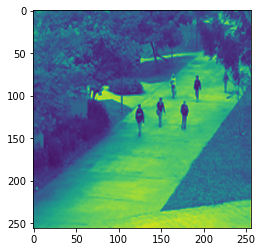

In [42]:
fig = plt.figure()
imgplot = plt.imshow(x[0][2][:,:,0])


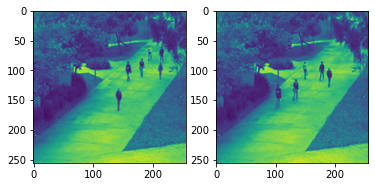

In [43]:
fig = plt.figure()
ax=fig.add_subplot(1,2,1)
imgplot = plt.imshow(x[0][3][:,:,0])
ax=fig.add_subplot(1,2,2)
imgplot = plt.imshow(x[0][4][:,:,0])

In [44]:
np.nonzero(y[0])

(array([15]),)

In [45]:
res = model(x)

In [46]:
res[0]

<tf.Tensor: shape=(120,), dtype=float32, numpy=
array([0.00872138, 0.00889778, 0.00769022, 0.00763282, 0.00756988,
       0.00911172, 0.00785899, 0.00751666, 0.00850717, 0.00954664,
       0.00941298, 0.00831491, 0.00959685, 0.00773579, 0.00770183,
       0.00808061, 0.0078221 , 0.00766069, 0.00832473, 0.00855668,
       0.00776229, 0.00853458, 0.00821822, 0.01006555, 0.0078695 ,
       0.00802436, 0.00757842, 0.00985959, 0.00931495, 0.00854855,
       0.00884349, 0.0092015 , 0.00789388, 0.00834018, 0.0079998 ,
       0.00825633, 0.00901582, 0.00817889, 0.00777714, 0.00931634,
       0.00808024, 0.00817364, 0.0079616 , 0.00815885, 0.00784956,
       0.00867837, 0.0083633 , 0.00910858, 0.00877879, 0.00800531,
       0.00801283, 0.00718501, 0.00758028, 0.00938347, 0.00867661,
       0.00818257, 0.0084631 , 0.00821458, 0.00930349, 0.00819901,
       0.00786806, 0.00882619, 0.00806077, 0.00891243, 0.00819513,
       0.00832803, 0.00770923, 0.00751664, 0.00764437, 0.00807111,
       0.00780

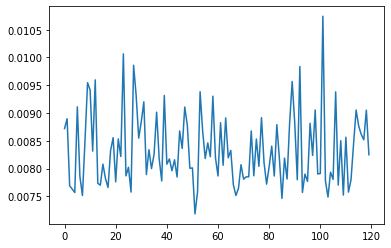

In [47]:
plt.plot(np.arange(120),res[0])

got test


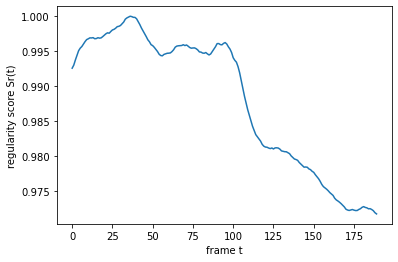

In [48]:
def get_single_test():
    sz = 200
    test = np.zeros(shape=(sz, 256, 256, 1))
    cnt = 0
    for f in sorted(listdir(Config.SINGLE_TEST_PATH)):
        if str(join(Config.SINGLE_TEST_PATH, f))[-3:] == "tif":
            img = Image.open(join(Config.SINGLE_TEST_PATH, f)).resize((256, 256))
            img = np.array(img, dtype=np.float32) / 256.0
            test[cnt, :, :, 0] = img
            cnt = cnt + 1
    return test
def evaluate():
    test = get_single_test()
    print("got test")
    sz = test.shape[0] - 10
    sequences = np.zeros((sz, 10, 256, 256, 1))
    # apply the sliding window technique to get the sequences
    for i in range(0, sz):
        clip = np.zeros((10, 256, 256, 1))
        for j in range(0, 10):
            clip[j] = test[i + j, :, :, :]
        sequences[i] = clip

    # get the reconstruction cost of all the sequences
    reconstructed_sequences = model.predict(sequences,batch_size=4)
    sequences_reconstruction_cost = np.array([np.linalg.norm(np.subtract(sequences[i],reconstructed_sequences[i])) for i in range(0,sz)])
    sa = (sequences_reconstruction_cost - np.min(sequences_reconstruction_cost)) / np.max(sequences_reconstruction_cost)
    sr = 1.0 - sa

    # plot the regularity scores
    plt.plot(sr)
    plt.ylabel('regularity score Sr(t)')
    plt.xlabel('frame t')
    plt.show()
    
evaluate()